# Text Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bbc=pd.read_csv('bbc-text.csv')

In [3]:
bbc

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [4]:
bbc['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

## Selecting the Data

In [5]:
data=bbc['text']

In [6]:
data

0       tv future in the hands of viewers with home th...
1       worldcom boss  left books alone  former worldc...
2       tigers wary of farrell  gamble  leicester say ...
3       yeading face newcastle in fa cup premiership s...
4       ocean s twelve raids box office ocean s twelve...
                              ...                        
2220    cars pull down us retail figures us retail sal...
2221    kilroy unveils immigration policy ex-chatshow ...
2222    rem announce new glasgow concert us band rem h...
2223    how political squabbles snowball it s become c...
2224    souness delight at euro progress boss graeme s...
Name: text, Length: 2225, dtype: object

In [7]:
data[0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [8]:
data[10]

'berlin cheers for anti-nazi film a german movie about an anti-nazi resistance heroine has drawn loud applause at berlin film festival.  sophie scholl - the final days portrays the final days of the member of the white rose movement. scholl  21  was arrested and beheaded with her brother  hans  in 1943 for distributing leaflets condemning the  abhorrent tyranny  of adolf hitler. director marc rothemund said:  i have a feeling of responsibility to keep the legacy of the scholls going.   we must somehow keep their ideas alive   he added.  the film drew on transcripts of gestapo interrogations and scholl s trial preserved in the archive of communist east germany s secret police. their discovery was the inspiration behind the film for rothemund  who worked closely with surviving relatives  including one of scholl s sisters  to ensure historical accuracy on the film. scholl and other members of the white rose resistance group first started distributing anti-nazi leaflets in the summer of 19

In [9]:
data[100]

'housewives lift channel 4 ratings the debut of us television hit desperate housewives has helped lift channel 4 s january audience share by 12% compared to last year.  other successes such as celebrity big brother and the simpsons have enabled the broadcaster to surpass bbc two for the first month since last july. bbc two s share of the audience fell from 11.2% to 9.6% last month in comparison with january 2004. celebrity big brother attracted fewer viewers than its 2002 series.  comedy drama desperate housewives managed to pull in five million viewers at one point during its run to date  attracting a quarter of the television audience. the two main television channels  bbc1 and itv1  have both seen their monthly audience share decline in a year on year comparison for january  while five s proportion remained the same at a slender 6.3%. digital multi-channel tv is continuing to be the strongest area of growth  with the bbc reporting freeview box ownership of five million  including on

In [10]:
data.shape

(2225,)

### Coverting words to TFIDF Vectors

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tf=TfidfVectorizer()
features=tf.fit_transform(data)

In [14]:
features

<2225x29421 sparse matrix of type '<class 'numpy.float64'>'
	with 449254 stored elements in Compressed Sparse Row format>

In [15]:
print(features)

  (0, 17912)	0.03527326856909453
  (0, 11316)	0.04538096715486077
  (0, 13875)	0.029167913103780276
  (0, 21799)	0.03482056877713841
  (0, 2180)	0.01225312651769481
  (0, 17564)	0.025562315052009173
  (0, 19637)	0.02889636216897788
  (0, 28890)	0.031086429718457854
  (0, 21689)	0.031736619079256845
  (0, 26726)	0.052589560503733805
  (0, 5056)	0.019412778977933816
  (0, 19505)	0.03628473510445815
  (0, 24832)	0.02739682354879833
  (0, 15138)	0.03854742127822957
  (0, 20525)	0.025562315052009173
  (0, 13073)	0.011714441027711674
  (0, 2513)	0.022083712948336394
  (0, 11639)	0.03781760933114879
  (0, 3973)	0.02434824614377657
  (0, 5741)	0.018644585697178587
  (0, 17303)	0.027910278815888142
  (0, 1389)	0.030609015982275757
  (0, 27829)	0.02081192829456486
  (0, 22477)	0.04657727815121275
  (0, 11443)	0.03894521242812987
  :	:
  (2224, 19254)	0.04494546023998106
  (2224, 4980)	0.0200087593066513
  (2224, 18502)	0.0235534388823643
  (2224, 4944)	0.041534772754004114
  (2224, 2251)	0.02476

## Clustering using K Means

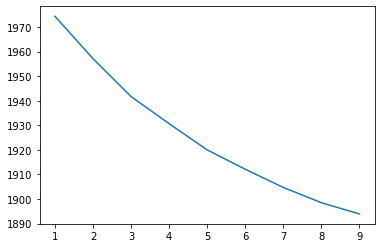

In [18]:
from sklearn.cluster import KMeans
SSD=[]
for k in range(1,10):
    kmeans=KMeans(n_clusters=k,random_state=10)
    kmeans.fit(features)
    SSD.append(kmeans.inertia_)
plt.plot(range(1,10),SSD);

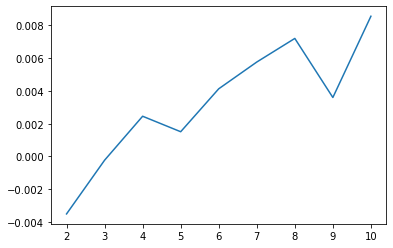

In [19]:
#Applying silhouette score
from sklearn.metrics import silhouette_score
SS=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,random_state=10)
    kmeans.fit(features)
    SS.append(silhouette_score(features,kmeans.predict(features)))
plt.plot(range(2,11),SS)

Suppose no of clusters=4

## Building the Clustering Model

In [38]:
kmeans=KMeans(n_clusters=4,random_state=10)
kmeans.fit(features)
kmeans.labels_

array([0, 0, 2, ..., 0, 0, 2])

## Appending the DF

In [39]:
bbc['Cluster']=kmeans.labels_

In [40]:
bbc

,category,text,Cluster
0,tech,tv future in the hands of viewers with home th...,0
1,business,worldcom boss left books alone former worldc...,0
2,sport,tigers wary of farrell gamble leicester say ...,2
3,sport,yeading face newcastle in fa cup premiership s...,2
4,entertainment,ocean s twelve raids box office ocean s twelve...,1
...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,0
2221,politics,kilroy unveils immigration policy ex-chatshow ...,3
2222,entertainment,rem announce new glasgow concert us band rem h...,0
2223,politics,how political squabbles snowball it s become c...,0


## Dimensionality reduction and visualization

In [41]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,perplexity=30)

In [42]:
features_tsne=tsne.fit_transform(features)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [43]:
print(features_tsne)

[[ 29.293081   10.398155 ]
 [-15.123771  -63.995396 ]
 [-14.513718   54.82457  ]
 ...
 [ 11.214002   28.652267 ]
 [ -2.4169254  -1.9697416]
 [-50.38562    46.71591  ]]


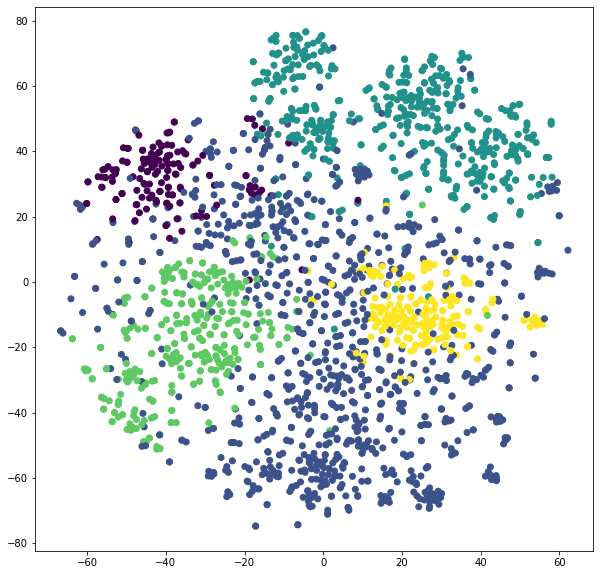

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(features_tsne[:,0],features_tsne[:,1],c=bbc['Cluster']);   #5 clusters

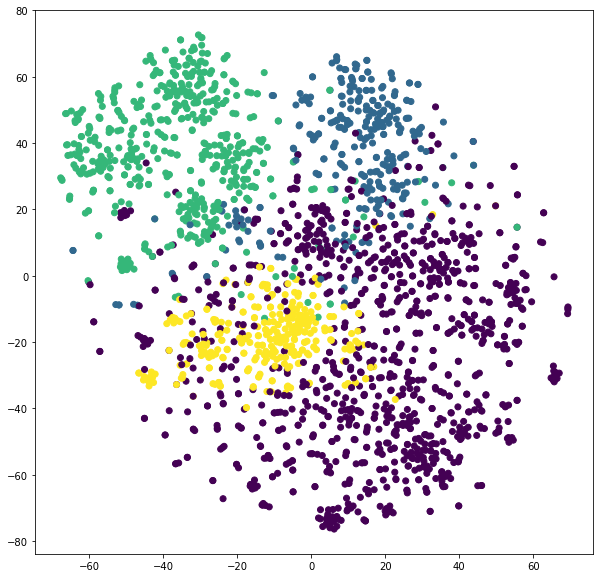

In [44]:
plt.figure(figsize=(10,10))
plt.scatter(features_tsne[:,0],features_tsne[:,1],c=bbc['Cluster']);   #4 clusters

Both clusters of 4 and 5 are taken